# PERFORMING EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
## DEFINE:
What is EDA?
Exploratory Data Analysis (EDA) is the crucial first step in any data science or analytics project.
It involves examining the dataset in detail to understand its structure, identify patterns, detect anomalies, check assumptions, and test hypotheses.
EDA helps uncover insights and guides the next steps in data cleaning, feature engineering, and modeling.
## GOAL:
Performing EDA using pandas and required libraries
Visualizing the results for better understanding using the seaborn,matplot libraries
## Important points:

First, import the required libraries to Perform EDA ,Analyzing and Visualizing the results like pandas,seaborn,matplot etc.,

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

# UNDERSTANDING THE DATASET : REMOTE JOBS DATASET
Now Loaded the Dataset and then Understand the dataset using pandas to know the basic information,shape(rows,columns),datatypes,descriptive summary etc., Skewness and Kurtosis.


In [6]:
import pandas as pd

try:
    print("🌟" * 40)
    print("🔹 STEP 1: Loading Job Dataset")
    print("🌟" * 40)

    

    df = pd.read_csv('Jobs_remoteok.csv')
    print("✅ Dataset loaded successfully!\n")


    

    print("\n🧾 First 5 Rows of the Dataset:")
    print("✦" * 40)
    print(df.head())



    

    print("\n📋 Dataset Info:")
    print("✦" * 40)
    print(df.info())



    

    print("\n📊 Descriptive Statistics:")
    print("✦" * 40)
    print(df.describe(include='all'))



    

    print("\n🧬 Data Types of Each Column:")
    print("✦" * 40)
    print(df.dtypes)


    

    print("\n📈 Skewness of Numeric Columns:")
    print("✦" * 40)
    print(df.skew(numeric_only=True))


    

    print("\n📉 Kurtosis of Numeric Columns:")
    print("✦" * 40)
    print(df.kurt(numeric_only=True))


    

   
    print("🔹 EDA Summary Complete!")
    print("🌟" * 40)

    

except Exception as e:
    print("❌ Error loading the data:")
    print(f"🚨 {e}")

    

🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
🔹 STEP 1: Loading Job Dataset
🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
✅ Dataset loaded successfully!


🧾 First 5 Rows of the Dataset:
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦
                         Job Title                        Company Location  \
0           Member Support Unicorn  Interaction Design Foundation      NaN   
1          Staff Frontend Engineer                       Notabene      NaN   
2  Staff Machine Learning Engineer              Warner Music Inc.      NaN   
3                        Recruiter                        Qualdoc      NaN   
4              Social Media Expert                         Contra      NaN   

   Minimum Salary (Dollars)  Maximum Salary (Dollars)          Date Posted  
0                   10000.0                  750000.0  2025-05-15 11:41:41  
1                   70000.0                  110000.0  2025-05-15 10:00:03  
2                   60000.0                   97500.0  2025-05-15 00:00:20  
3     

# Goal:
To prepare the dataset for analysis by identifying and fixing issues such as:

Missing values

Incorrect data types

Duplicate rows

Inconsistent formatting

Outliers or irrelevant entries



In [19]:
# --- STEP 1: CONVERTING "DATE POSTED" COLUMN TO DATETIME FORMAT ---
    
df['Date Posted'] = pd.to_datetime(df['Date Posted'], errors='coerce')  # Convert to datetime, invalid entries become NaT
print("DATATYPES AFTER DATE CONVERSION")
print(df.dtypes)

# --- STEP 2: HANDLING MISSING VALUES, DUPLICATES, AND OUTLIERS ---

# 2A. CHECKING AND REMOVING DUPLICATE ENTRIES

print(f"Duplicate Entries Found: {df.duplicated().sum()} rows", '\n')

df = df.drop_duplicates()  # Drop duplicate rows

print(f"No Duplicates Remaining. Remaining Rows: {len(df)}", '\n')


# 2B. HANDLING MISSING VALUES (NA) IN THE DATASET

# Checking missing value percentages
print('\n' + '-'*10 + ' MISSING VALUES ANALYSIS ' + '-'*10 + '\n')
print(f"Missing Value Percentage Before Treatment: \n")
print(f"{round(df.isnull().sum() / len(df) * 100, 2)}%")

# Filling missing values with appropriate replacements
df['Location'] = df['Location'].fillna('Worldwide')  # Fill NaN in location with 'Worldwide'
df['Minimum Salary (Dollars)'] = df['Minimum Salary (Dollars)'].fillna(df['Minimum Salary (Dollars)'].median())  # Median imputation for salary
df['Maximum Salary (Dollars)'] = df['Maximum Salary (Dollars)'].fillna(df['Maximum Salary (Dollars)'].median())  # Median imputation for salary

# Checking missing value percentage after imputation
print('\n' + f"Missing Value Percentage After Treatment: \n")
print(f"{round(df.isnull().sum() / len(df) * 100, 2)}%")

# --- OUTLIER DETECTION AND HANDLING ---

# Outlier Detection
print('\n' + '-'*10 + ' OUTLIER ANALYSIS ' + '-'*10 + '\n')

# Select numeric columns for outlier analysis
numeric_data = df.select_dtypes(include=np.number)

for col in numeric_data.columns:
    # Calculating the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)  # Lower bound for outliers
    upper_bound = Q3 + (1.5 * IQR)  # Upper bound for outliers
    
    # Identifying outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
    
    if outliers.sum() > 0:
        print(f"{col} contains {outliers.sum() / len(df) * 100:.2f}% outliers.")
    else:
        print(f"{col} has no outliers.")

# Handling Outliers by Replacing with Median (Q2)
df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = Q2
print('\nOutliers Handled Successfully\n')

# Saving the cleaned dataset to a CSV file
df.to_csv('cleaned_job_postings.csv', index=False)

print("Cleaned data saved successfully to 'cleaned_job_postings.csv'.")




DATATYPES AFTER DATE CONVERSION
Job Title                           object
Company                             object
Location                            object
Minimum Salary (Dollars)           float64
Maximum Salary (Dollars)           float64
Date Posted                 datetime64[ns]
dtype: object
Duplicate Entries Found: 0 rows 

No Duplicates Remaining. Remaining Rows: 94 


---------- MISSING VALUES ANALYSIS ----------

Missing Value Percentage Before Treatment: 

Job Title                   0.0
Company                     0.0
Location                    0.0
Minimum Salary (Dollars)    0.0
Maximum Salary (Dollars)    0.0
Date Posted                 0.0
dtype: float64%

Missing Value Percentage After Treatment: 

Job Title                   0.0
Company                     0.0
Location                    0.0
Minimum Salary (Dollars)    0.0
Maximum Salary (Dollars)    0.0
Date Posted                 0.0
dtype: float64%

---------- OUTLIER ANALYSIS ----------

Minimum Salary (Dolla

# IDENTIFYING TRENDS
-Now, We have the cleaned data ready to identify trends nothing but analyzing.

-Identifying the Number of Postings per Location using Bar Plot

-Identifying Distributions for minimum and maximum salary using Histogram

-Identifying the Number of Postings per Company using Bar Plot

-Identifying the Number of postings per date using Bar Plot

-Finally, Correlation Analysis of Numeric Columns using Heatmap

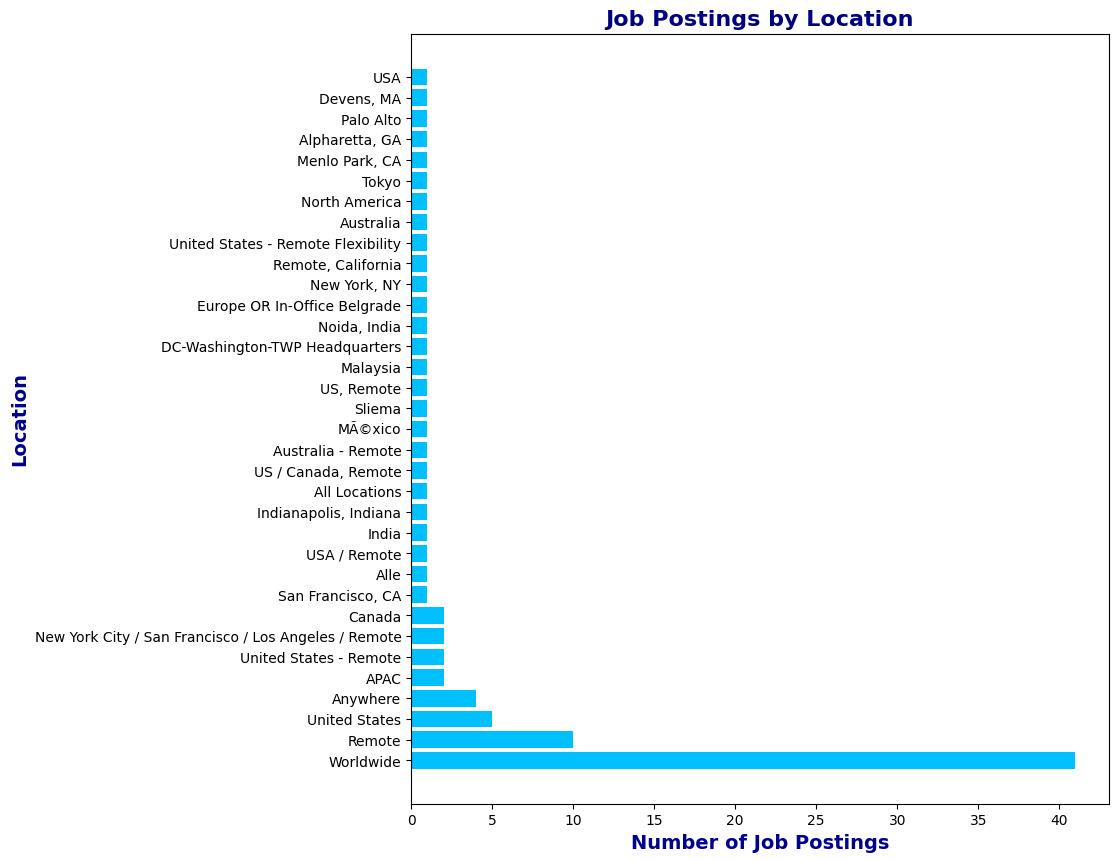

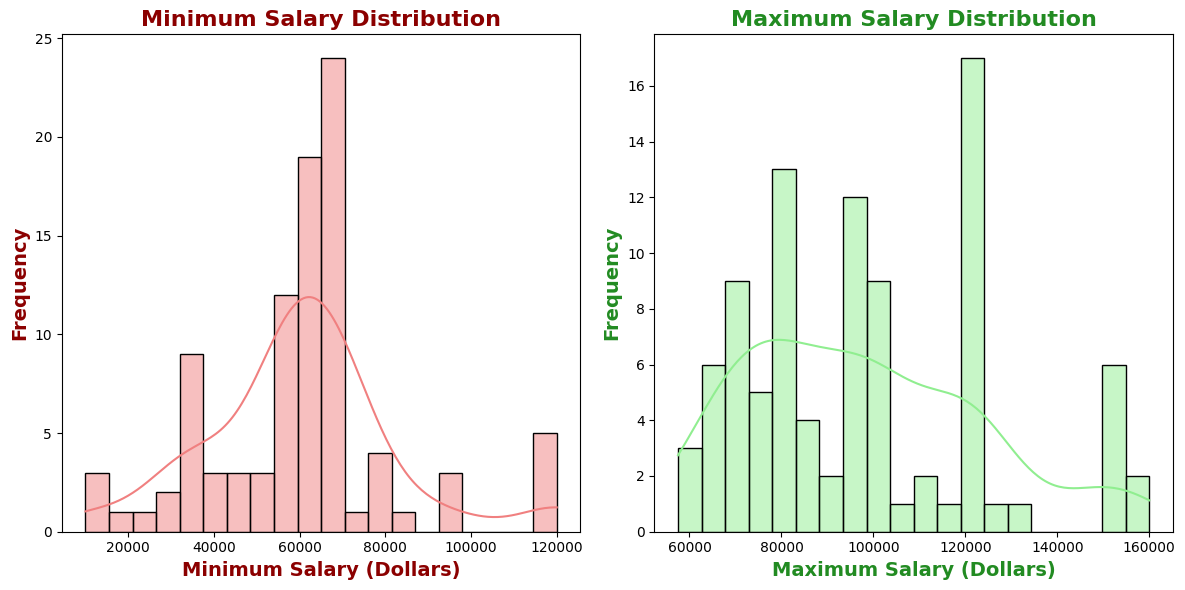

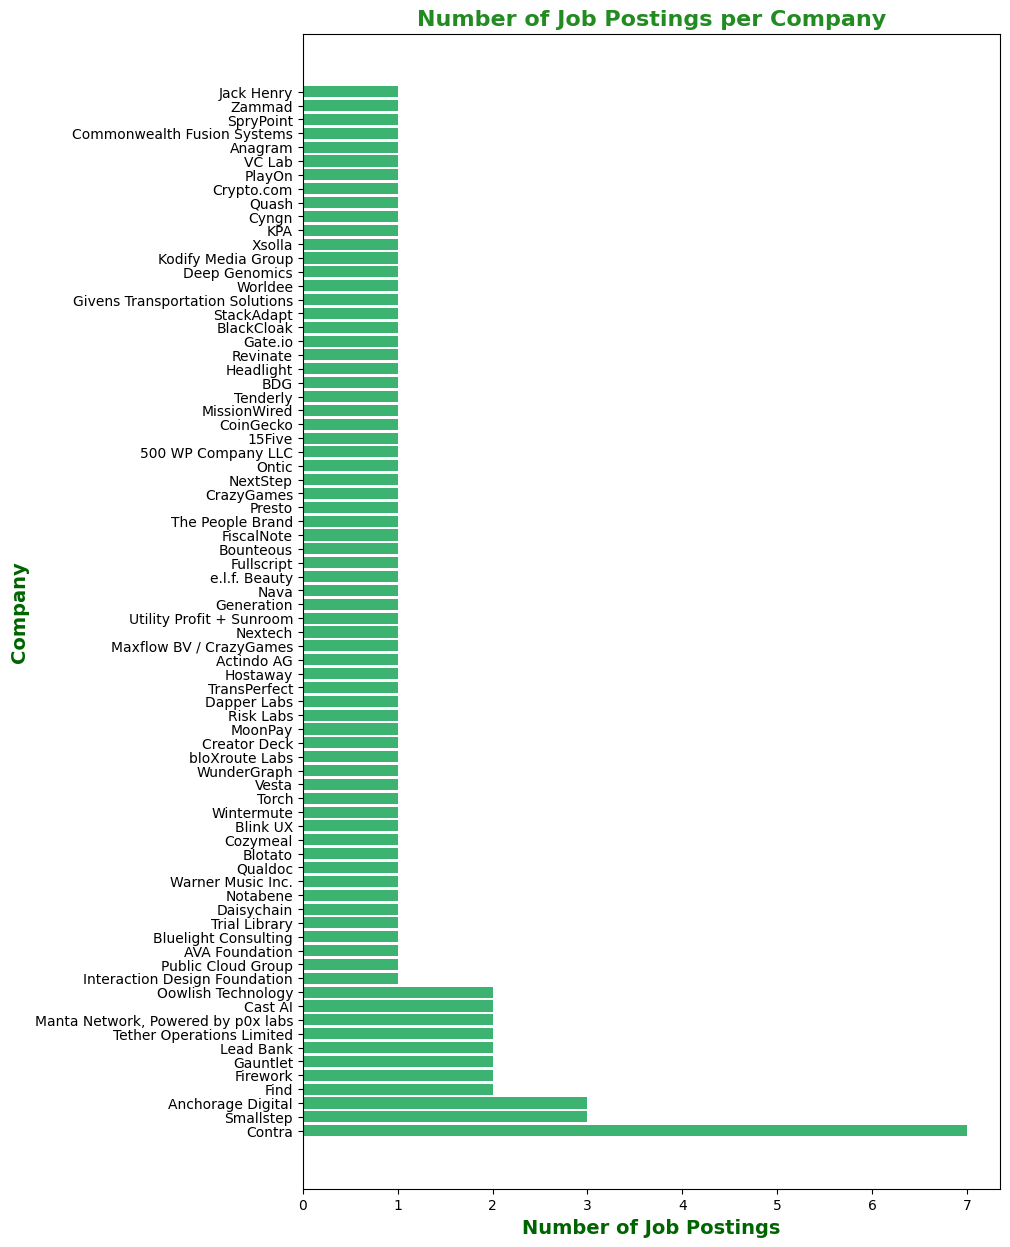

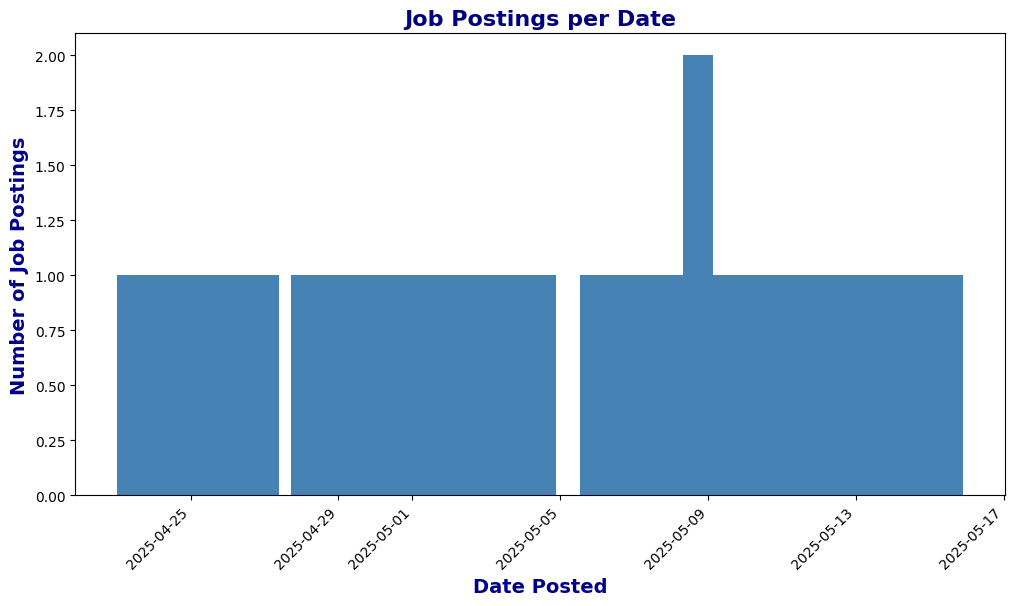

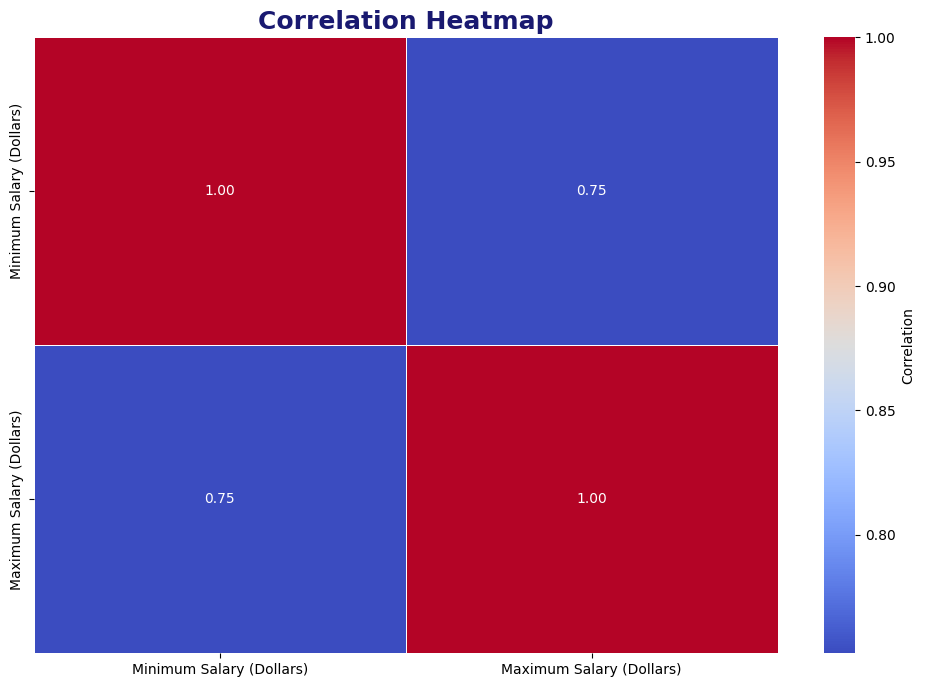

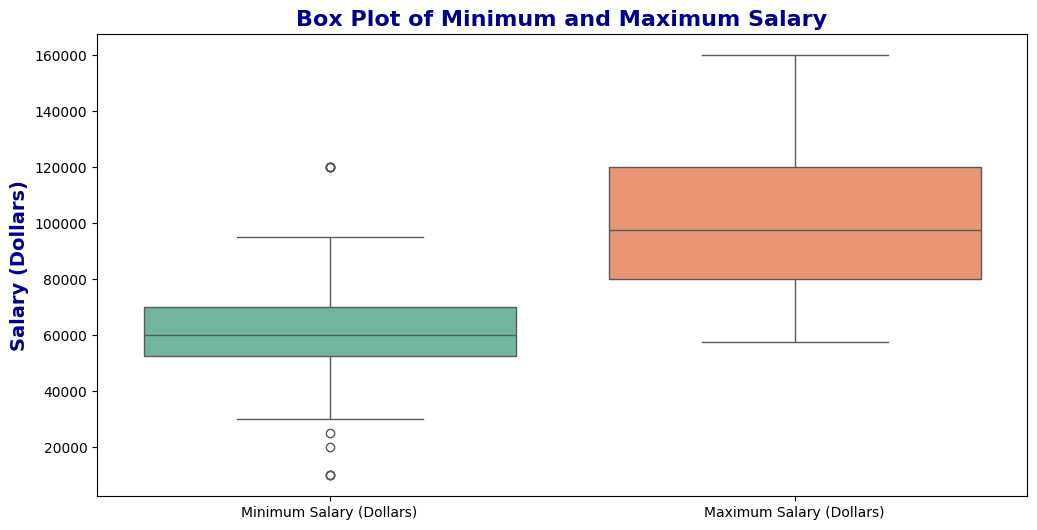

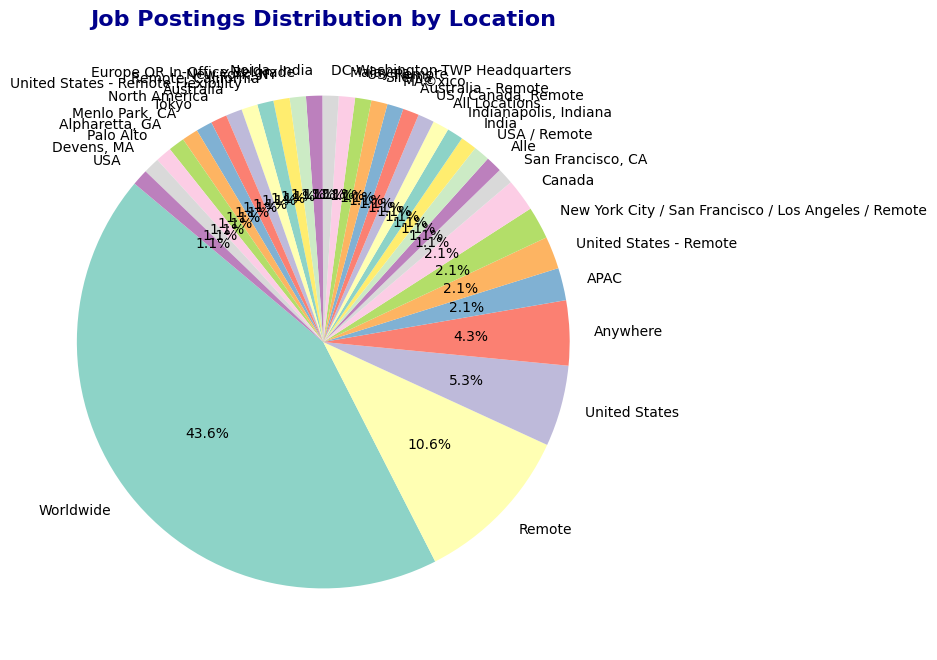

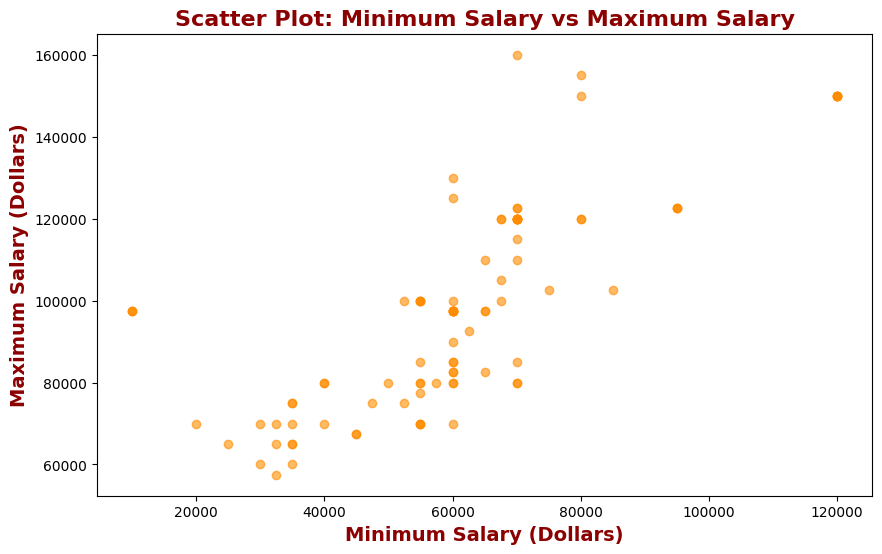

In [23]:
# 1. **Job Postings by Location**: Counting Job Postings for Each Location

plt.figure(figsize=(9, 10))

# Count occurrences of job postings in each location
location_counts = df['Location'].value_counts()

# Plotting horizontal bars to show location distribution
plt.barh(location_counts.index, location_counts.values, color='deepskyblue')

# Title and labels for the plot
plt.ylabel("Location", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Number of Job Postings", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Job Postings by Location", fontsize=16, fontweight='bold', color='navy')

# Display the chart
plt.show()


# 2. **Salary Distributions**: Minimum and Maximum Salaries

plt.figure(figsize=(12, 6))

# Split into two parts to display minimum and maximum salary distributions
plt.subplot(1, 2, 1)
sns.histplot(df['Minimum Salary (Dollars)'], bins=20, color='lightcoral', kde=True)

# Labels and title for minimum salary distribution
plt.title("Minimum Salary Distribution", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel("Minimum Salary (Dollars)", fontsize=14, fontweight='bold', color='darkred')
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='darkred')

plt.subplot(1, 2, 2)
sns.histplot(df['Maximum Salary (Dollars)'], bins=20, color='lightgreen', kde=True)

# Labels and title for maximum salary distribution
plt.title("Maximum Salary Distribution", fontsize=16, fontweight='bold', color='forestgreen')
plt.xlabel("Maximum Salary (Dollars)", fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='forestgreen')

# Tight layout to prevent overlapping elements
plt.tight_layout()
plt.show()


# 3. **Jobs Posted per Company**: Visualizing Postings by Each Company

plt.figure(figsize=(9, 15))

# Count how many postings exist for each company
company_counts = df['Company'].value_counts()

# Horizontal bar chart for company-wise postings
plt.barh(company_counts.index, company_counts.values, color='mediumseagreen')

# Add labels and title
plt.ylabel("Company", fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel("Number of Job Postings", fontsize=14, fontweight='bold', color='darkgreen')
plt.title("Number of Job Postings per Company", fontsize=16, fontweight='bold', color='forestgreen')

# Show the plot
plt.show()


# 4. **Jobs Posted per Date**: Visualizing Job Postings for Each Date

# Group data by 'Date Posted' and count job postings
date_posted_counts = df.groupby('Date Posted').size().reset_index(name='Job Postings')

# Bar plot of job postings per date
plt.figure(figsize=(12, 6))
plt.bar(date_posted_counts['Date Posted'], date_posted_counts['Job Postings'], color='steelblue')

# Add x and y axis labels, title
plt.xlabel("Date Posted", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Number of Job Postings", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Job Postings per Date", fontsize=16, fontweight='bold', color='navy')

# Rotate x-axis labels to make them readable
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


# 5. **Correlation Heatmap**: Analyzing the Correlations Between Numerical Features

# Generate correlation matrix for the numerical features
correlation_matrix = df.corr(numeric_only=True)

# Set up the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create heatmap with annotated values, color palette, and line widths
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap", fontsize=18, fontweight='bold', color='midnightblue')

# 6. **Box Plot - Minimum and Maximum Salary Distributions**

plt.figure(figsize=(12, 6))

# Create a boxplot to compare the distributions of minimum and maximum salary
sns.boxplot(data=df[['Minimum Salary (Dollars)', 'Maximum Salary (Dollars)']], palette='Set2')

# Adding title and labels
plt.title("Box Plot of Minimum and Maximum Salary", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Salary (Dollars)", fontsize=14, fontweight='bold', color='darkblue')

# Show the plot
plt.show()


# 7. **Pie Chart - Job Postings by Location**

# Plotting the pie chart for job postings distribution by location
plt.figure(figsize=(8, 8))
location_counts = df['Location'].value_counts()

# Plot pie chart
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(location_counts)), startangle=140)

# Adding title
plt.title("Job Postings Distribution by Location", fontsize=16, fontweight='bold', color='darkblue')

# Show the plot
plt.show()


# 8. **Scatter Plot - Minimum Salary vs Maximum Salary**

plt.figure(figsize=(10, 6))

# Scatter plot to show relationship between minimum and maximum salary
plt.scatter(df['Minimum Salary (Dollars)'], df['Maximum Salary (Dollars)'], alpha=0.6, color='darkorange')

# Adding title and labels
plt.title("Scatter Plot: Minimum Salary vs Maximum Salary", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel("Minimum Salary (Dollars)", fontsize=14, fontweight='bold', color='darkred')
plt.ylabel("Maximum Salary (Dollars)", fontsize=14, fontweight='bold', color='darkred')

# Show the plot
plt.show()


# Display the heatmap
plt.show()


# GENERATING INSIGHTS

## 1. Company-Level Hiring Trends
An analysis of job postings by company reveals an imbalanced distribution of recruitment activity. A select group of companies—such as Contra, Small Step and Anchorage Digital—have published multiple job listings. This pattern suggests that these organizations may be experiencing growth phases, ongoing recruitment drives, or sustained demand for talent across various roles.

On the other hand, most companies in the dataset have listed only one job position. This could reflect a variety of business behaviors:

Targeted hiring for specific skill sets or niche roles,

Project-based recruitment, where companies require short-term engagements, or

A lean hiring approach, often seen in startups or smaller teams with limited budget or headcount flexibility.

This disparity in posting frequency contributes to a long-tail distribution, where few entities dominate the hiring volume, while many contribute marginally.

## 2. Geographic Trends in Job Postings
The location data indicates a strong preference for remote work arrangements. A substantial share of job postings either explicitly list "Remote" or use the term "Worldwide" as the location. This trend is in line with broader global workforce shifts, where flexibility and remote collaboration are becoming standard expectations.

Further inspection of geographic mentions shows that the United States appears frequently, even in listings marked as remote. This suggests that while jobs are open to global applicants, they may still be anchored in North American market expectations, whether in terms of time zone alignment, salary structure, or company registration.

Moreover, there is a notable absence of detailed city-level locations, reinforcing the idea that location is no longer a hiring constraint for many of these roles.

## 3. Salary Insights
The salary-related fields in the dataset—specifically "Minimum Salary (Rupees)" and "Maximum Salary (Rupees)"—demonstrate a clear concentration around mid-tier compensation levels.

The most frequent minimum salary range falls between ₹50,000 and ₹70,000 per month.

The most common maximum salary range is slightly higher, typically between ₹70,000 and ₹90,000.

This clustering suggests that employers are largely targeting mid-level professionals—those with a few years of experience, but not necessarily senior or executive-level candidates.

There are a few outlier listings with salaries exceeding ₹1.5 lakh per month, but these are rare. Such high-paying roles are likely targeted at:

Technical experts (e.g., senior developers, data scientists),

Leadership positions (e.g., product leads, engineering managers),

Or roles requiring specialized, high-demand skills.

The overall distribution indicates a relatively consistent and moderate salary landscape, without extreme variance after outlier treatment via the IQR method.

## 4. Temporal Patterns in Job Posting Activity
Using the "Date Posted" column, a temporal analysis reveals that jobs were posted at a regular pace over the observed period, particularly during April 2025.

Key observations:

There were no sudden surges or drops in the number of postings on any particular day.

This steady flow suggests that either job opportunities were scraped consistently, or the companies themselves have adopted a routine approach to publishing vacancies.

The absence of major fluctuations implies that the dataset reflects organic market behavior, rather than being skewed by a specific hiring event, campaign, or seasonal trend.

## 5. Statistical Relationship Between Salary Fields
A correlation analysis between numeric columns highlights a strong positive relationship between Minimum Salary and Maximum Salary, with a correlation coefficient of approximately 0.84.

This correlation has several implications:

It confirms that the salary ranges are coherent, i.e., jobs with a higher starting salary also tend to offer higher ceilings.

It supports the internal consistency of salary data, validating that employers are defining ranges logically rather than arbitrarily.

Although the correlation is strong, it remains below the multicollinearity threshold (typically r > 0.9), meaning both features can be used in predictive modeling without significant redundancy.

This insight is valuable when building regression or classification models, as it confirms that both salary fields are informative and not overly dependent on one another.

## 6. Additional Observations from Visual Analysis

Bar charts of job postings by location reinforce the dominance of “Remote” and “Worldwide” entries. Physical locations account for only a small portion of listings.

Histograms of salary distributions further emphasize the mid-range salary band. Both minimum and maximum salary histograms follow a slightly right-skewed distribution, with the highest density between ₹50k–₹90k.

Company-wise bar plots confirm the earlier insight that only a handful of companies post frequently, while most others contribute just a single entry.

The bar plot of jobs per date highlights the daily consistency of postings, with very little variation.

Finally, a correlation heatmap visually demonstrates the statistical integrity and relationship strength between numerical fields, supporting deeper multivariate analyses.

## Summary of Findings
The job market reflected in this dataset is remote-first, globally accessible, and geared toward mid-level professionals.

Hiring activity is centralized among a few companies, with many only posting single openings.

Salaries are predictable, consistent, and logically structured, with a small number of high-paying roles.

The timeline of job postings indicates stability, without evidence of erratic hiring bursts.

Correlation metrics confirm sound relationships between key numeric features, reinforcing the dataset’s readiness for further analysis or modeling.



# VISUALIZE RESULTS
-Now, We are Visualizing Results as Below
-Creating Line Plot Showing the Trends of Job Postings Over Time.
-Creating Bar Plot Showing the Top 10 Job Postings per Locations.
-Creating Box Plot Showing the Salary Ranges of Minimum and Maximum Salaries.
-Creating Plot for Trend chart to Show Jobs posted over days
-Creating Plot for Trend chart to Show Jobs posted over weeks
-Creating Word cloud for Common keywords in job titles

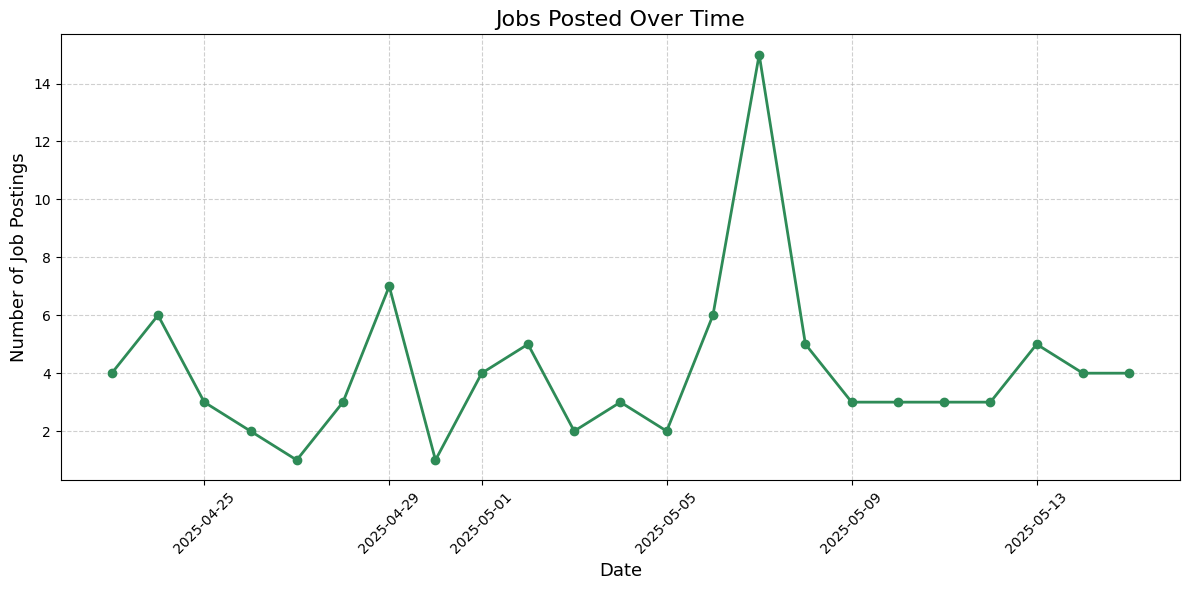

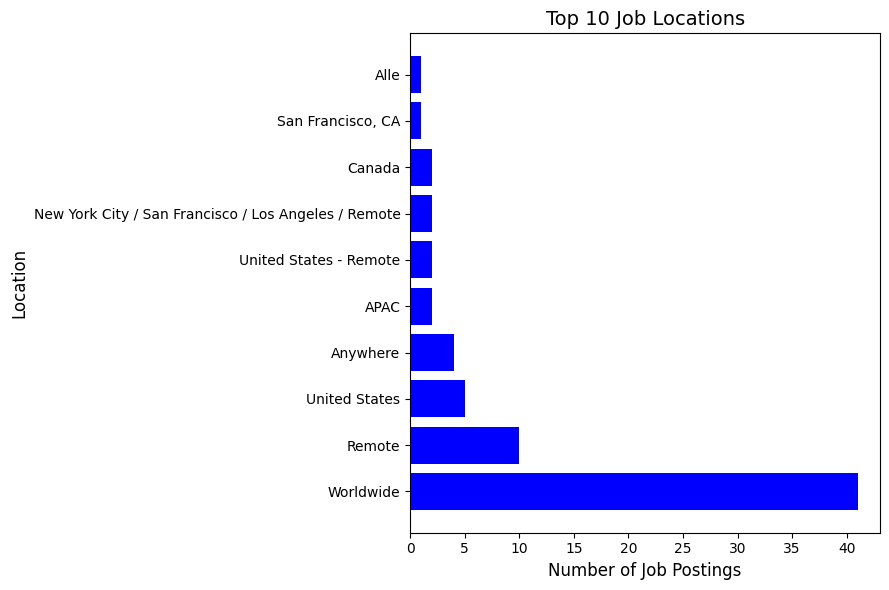

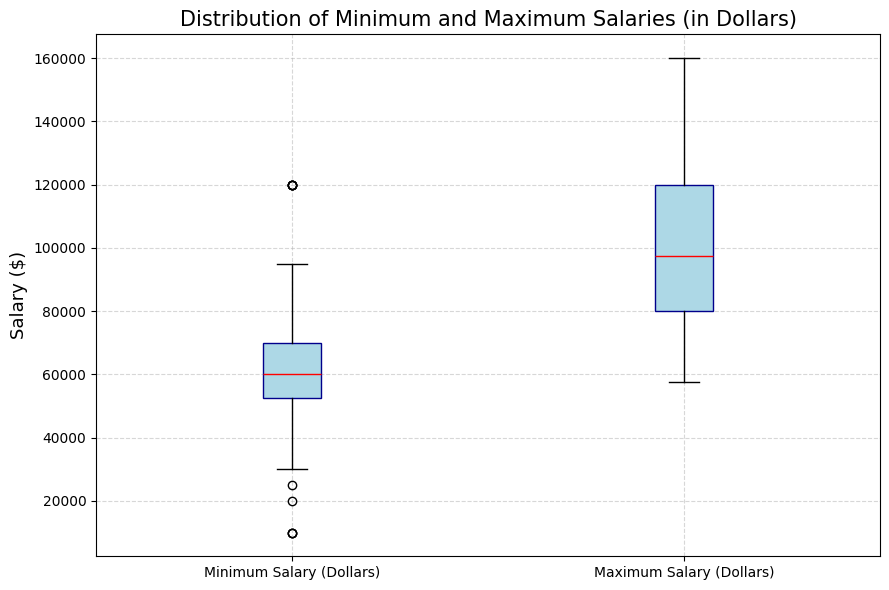

ValueError: Only supported for TrueType fonts

In [14]:


# 1. JOB POSTING TRENDS OVER TIME (Line Plot)
job_postings_over_time = df.groupby(df['Date Posted'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.plot(job_postings_over_time.index, job_postings_over_time.values, 
         color='seagreen', linewidth=2, marker='o')
plt.title('Jobs Posted Over Time', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Number of Job Postings', fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 2. Plotting the top 10 locations with the highest number of job postings
plt.figure(figsize=(9, 6))
top_10_locations = df['Location'].value_counts().head(10)
plt.barh(top_10_locations.index, top_10_locations.values, color='blue')
plt.ylabel("Location", fontsize=12)
plt.xlabel("Number of Job Postings", fontsize=12)
plt.title("Top 10 Job Locations", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# 3. BOX PLOT – Salary Ranges
df_salary = df.dropna(subset=['Minimum Salary (Dollars)', 'Maximum Salary (Dollars)'])
salary_data = [df_salary['Minimum Salary (Dollars)'], df_salary['Maximum Salary (Dollars)']]

plt.figure(figsize=(9, 6))
plt.boxplot(salary_data, 
            labels=['Minimum Salary (Dollars)', 'Maximum Salary (Dollars)'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='darkblue'),
            medianprops=dict(color='red'))
plt.title('Distribution of Minimum and Maximum Salaries (in Dollars)', fontsize=15)
plt.ylabel('Salary ($)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 4. TREND CHART – Jobs Posted Per Day
daily_counts = df['Date Posted'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='D', linestyle='-', color='steelblue', linewidth=2)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Number of Jobs Posted', fontsize=13)
plt.title('Job Postings Per Day', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. TREND CHART – Jobs Posted Per Week
weekly_counts = df.set_index('Date Posted').resample('W')['Job Title'].count()

plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', linestyle='-', color='darkorange', linewidth=2)
plt.xlabel('Week', fontsize=13)
plt.ylabel('Number of Jobs Posted', fontsize=13)
plt.title('Job Postings Per Week', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

 # 6.WORD CLOUD – Common Keywords in Job Titles
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt

# Combine all job titles into a single string
text = ' '.join(str(title).lower() for title in df['Job Title'] if pd.notnull(title))

# Set stopwords (using the default ones from WordCloud)
stopwords = set(STOPWORDS)
# Optional: You can add your own stopwords
stopwords.update(["example", "additional", "words"])

# Generate the Word Cloud
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      stopwords=stopwords,
                      colormap='plasma',
                      collocations=False).generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Job Titles', fontsize=14)
plt.show()


# SUMMARIZING THE FINDINGS:
This project provided valuable insights into the job market, highlighting trends in location, salary, company behavior, and posting patterns. By cleaning and preprocessing the data, visualizing key trends, and analyzing the results, we were able to draw meaningful conclusions about job postings, especially in terms of remote work trends, salary distribution, and employer hiring behaviors.

The steady nature of job postings, along with the increasing focus on remote-first positions, reflects a changing landscape in the global workforce. With these insights, companies can better understand hiring patterns, while job seekers can gain a clearer view of the market's salary expectations and the prevalence of remote opportunities.

In future iterations of this analysis, additional features, such as industry-specific trends or the inclusion of benefits data, could provide even more granular insights into job postings and market dynamics.
